<a href="https://colab.research.google.com/github/Mikaner/reinforcement/blob/main/Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

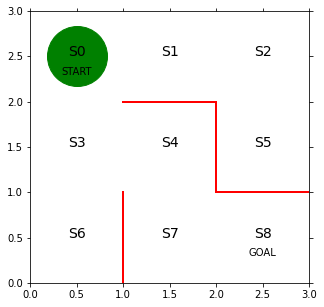

In [45]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# draw red wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0~S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

# draw green circle for S0
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [46]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0~7, 列は移動方向で↑，→，↓，←を指す
theta_0 = np.array([[np.nan,      1,      1, np.nan], # S0
                    [np.nan,      1, np.nan,      1], # S1
                    [np.nan, np.nan,      1,      1], # S2
                    [     1,      1,      1, np.nan], # S3
                    [np.nan, np.nan,      1,      1], # S4
                    [     1, np.nan, np.nan, np.nan], # S5
                    [     1, np.nan, np.nan, np.nan], # S6
                    [     1,      1, np.nan, np.nan], # S7 ※S8はゴールなので方策なし
                    ])


In [47]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1
Q

array([[       nan, 0.06234355, 0.04944749,        nan],
       [       nan, 0.02283146,        nan, 0.05303896],
       [       nan,        nan, 0.0940974 , 0.07674488],
       [0.03736994, 0.09199857, 0.02883045,        nan],
       [       nan,        nan, 0.09654314, 0.02046607],
       [0.09596609,        nan,        nan,        nan],
       [0.05111155,        nan,        nan,        nan],
       [0.07771725, 0.02040795,        nan,        nan]])

In [48]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        print(np.nansum(theta[i, :]))
    pi = np.nan_to_num(pi)

    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

2.0
2.0
2.0
3.0
2.0
1.0
1.0
2.0


In [49]:
# ε-greedy法

def get_action(s, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']

    # 行動決定
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]

    # 行動をindexへ
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    # Qとepsilonとpiはいるのか？
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]

    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [50]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [51]:
def Q_learning(s, a, r, s_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r + Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])

    return Q

In [52]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0 # start
    a = a_next = get_action(s, Q, epsilon, pi) # 初期の行動
    s_a_history = [[0, np.nan]]

    while 1:
        a = a_next

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        # 価値関数を更新
#        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        Q = Q_learning(s, a, r, s_next, Q, eta, gamma)

        # 終了判定
        if s_next == 8:
            break
        else:
            s = s_next
    
    return [s_a_history, Q]

In [53]:
eta = 0.1     # 学習率
gamma = 0.9   # 時間割引率
epsilon = 0.5 # ε-greedy法のランダムを選ぶ比率
v = np.nanmax(Q, axis=1) # 状態ごとに価値の最大値を決める
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print("Episode :", episode)

    epsilon = epsilon / 2

    # Q_learningで迷路を解き、移動した履歴と更新したQを決める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1) # 状態ごとに価値の最大値を決める
    print(np.sum(np.abs(new_v - v))) # 状態価値の変化を出力
    v = new_v
    V.append(v)

    print("Steps :", len(s_a_history))

    episode = episode + 1
    if episode > 100:
        break

Episode : 1
0.05577637954692564
Steps : 13
Episode : 2
0.12065417801923818
Steps : 13
Episode : 3
0.13868211846423312
Steps : 7
Episode : 4
0.16030919153222858
Steps : 5
Episode : 5
0.18567063013721305
Steps : 5
Episode : 6
0.213512599886776
Steps : 5
Episode : 7
0.244064290627213
Steps : 5
Episode : 8
0.2775758080319232
Steps : 5
Episode : 9
0.3143214876421394
Steps : 5
Episode : 10
0.3546032525323165
Steps : 5
Episode : 11
0.39875407062589113
Steps : 5
Episode : 12
0.44714156520163617
Steps : 5
Episode : 13
0.5001718305611148
Steps : 5
Episode : 14
0.5582935041070173
Steps : 5
Episode : 15
0.6220021461577102
Steps : 5
Episode : 16
0.6918449796551258
Steps : 5
Episode : 17
0.7684260434829581
Steps : 5
Episode : 18
0.8524118153826747
Steps : 5
Episode : 19
0.9445373634290588
Steps : 5
Episode : 20
1.0456130887075608
Steps : 5
Episode : 21
1.1565321262346853
Steps : 5
Episode : 22
1.2782784763012702
Steps : 5
Episode : 23
1.4119359443268837
Steps : 5
Episode : 24
1.5586979740311053
Step

In [54]:
print("              up      ,      right    ,      down     ,      left     ")
Q

              up      ,      right    ,      down     ,      left     


array([[           nan, 5.55123345e-02, 1.28065766e+03,            nan],
       [           nan, 2.28314637e-02,            nan, 5.25404513e-02],
       [           nan,            nan, 9.40973978e-02, 7.67448840e-02],
       [3.73699412e-02, 2.84671405e+03, 2.88304548e-02,            nan],
       [           nan,            nan, 6.32693088e+03, 2.04660692e-02],
       [9.59660855e-02,            nan,            nan,            nan],
       [5.11115495e-02,            nan,            nan,            nan],
       [7.89694058e-02, 1.40608464e+04,            nan,            nan]])

In [56]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm # color map

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    # フレームごとの描画内容
    # 各マスに状態価値の大きさに基づく色付きの資格を描画
    line, = ax.plot([0.5], [2.5], marker="s",
                    color=cm.jet(V[i][0]), markersize=85) # S0
    line, = ax.plot([1.5], [2.5], marker="s",
                    color=cm.jet(V[i][1]), markersize=85) # S1
    line, = ax.plot([2.5], [2.5], marker="s",
                    color=cm.jet(V[i][2]), markersize=85) # S2
    line, = ax.plot([0.5], [1.5], marker="s",
                    color=cm.jet(V[i][3]), markersize=85) # S3
    line, = ax.plot([1.5], [1.5], marker="s",
                    color=cm.jet(V[i][4]), markersize=85) # S4
    line, = ax.plot([2.5], [1.5], marker="s",
                    color=cm.jet(V[i][5]), markersize=85) # S5
    line, = ax.plot([0.5], [0.5], marker="s",
                    color=cm.jet(V[i][6]), markersize=85) # S6
    line, = ax.plot([1.5], [0.5], marker="s",
                    color=cm.jet(V[i][7]), markersize=85) # S7
    line, = ax.plot([2.5], [0.5], marker="s",
                    color=cm.jet(1.0), markersize=85) # S8
    return (line, )

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())